In [5]:
# basic
import os
from pathlib import Path
import datetime

#working with data
import IPython
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import sklearn
import math


# librosa (the mother of audio files)
import librosa
import librosa.display

# warnings
import warnings
warnings.filterwarnings('ignore')

# Apply the default theme
sns.set_theme()

# Explore Audio Data

We will use `librosa`, which is the mother of audio files.

## Understanding Audio
Let's first Explore our Audio Data to see how it looks (we'll work with `reggae.00036.wav` file).

* **Sound**: sequence of vibrations in varying pressure strengths (`y`)
* The **sample rate** (`sr`) is the number of samples of audio carried per second, measured in Hz or kHz

In [2]:
general_path = Path('./music/slom-1')
songs_filenames = []
for file in Path.iterdir(general_path):
  filename = Path(file).name
  songs_filenames.append(filename)
  # print()
songs_filenames.sort()
print("songs_filenames = ")
print(songs_filenames)

songs_filenames = 
['highanxiety-suicidaltendencies.wav', 'superman-goldfinger.wav', 'warriorscode-dropkickmurphys.wav']


In [92]:
def song_name_and_path(song):
  song_name = song[:song.index(".")]
  song_path = Path.joinpath(general_path, song)
  return song_name, song_path

In [94]:
songs = songs_filenames.copy()
song_names = list()
song_paths = list()
for i in range(len(songs)):
  song = songs[i]
  song_name, song_path = song_name_and_path(song)
  song_names.append(song_name)
  song_paths.append(song_path)

print(song_names)
print(song_paths)

['highanxiety-suicidaltendencies', 'superman-goldfinger', 'warriorscode-dropkickmurphys']
[PosixPath('music/slom-1/highanxiety-suicidaltendencies.wav'), PosixPath('music/slom-1/superman-goldfinger.wav'), PosixPath('music/slom-1/warriorscode-dropkickmurphys.wav')]


In [84]:
# Importing 1st file
songs = songs_filenames.copy()
song_1 = songs.pop(0)
song_1_name, song_1_path = song_name_and_path(song_1)
print("song_1_name:", song_1_name)
print("song_1_path:", song_1_path)

song_1_name: highanxiety-suicidaltendencies
song_1_path: music/slom-1/highanxiety-suicidaltendencies.wav


In [83]:
# Importing 2nd file
song_2 = songs.pop(0)
song_2_name, song_2_path = song_name_and_path(song_2)
print("song_2_name:", song_2_name)
print("song_2_path:", song_2_path)

song_2_name: warriorscode-dropkickmurphys.w
song_2_path: music/slom-1/warriorscode-dropkickmurphys.wav


In [ ]:
# Importing 1 file
songs = songs_filenames.copy()
song_1 = songs.pop(0)
song_1_name, song_1_path = song_name_and_path(song_1)
print("song_1_name:", song_1_name)
print("song_1_path:", song_1_path)

song_1_name: highanxiety-suicidaltendencies
song_1_path: music/slom-1/highanxiety-suicidaltendencies.wav


In [4]:
sample_rate = 44100
y, sr = librosa.load(path=song_1_path, sr=sample_rate)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
yshape = np.shape(y)[0]
print("y shape value:", yshape)

y: [0.         0.         0.         ... 0.00057983 0.00062561 0.00068665] 

y shape: (5351744,) 

Sample Rate (KHz): 44100 

y shape value: 5351744


In [6]:
# Verify length of the audio
dur_s = yshape / sr
dur_min = dur_s / 60
print('Check Len of Audio')
print("dur_s:", dur_s)
print("dur_min:", dur_min)
dur_min_s = datetime.timedelta(seconds=dur_s)
min = str(dur_min_s)[2:4]
s = str(dur_min_s)[5:7]
ms = str(dur_min_s)[8:]
print()
print("Duration")
print(dur_min_s)
print("min:", min)
print("s:", s)
print("ms:", ms)

Check Len of Audio
dur_s: 121.35473922902494
dur_min: 2.022578987150416

Duration
0:02:01.354739
min: 02
s: 01
ms: 354739


In [7]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file)
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.         0.         0.         ... 0.00057983 0.00062561 0.00068665]
Audio File shape: (5351744,)


## Save chart/figure to ex_outputs

In [74]:
def save_chart(folder, filename, plt):
  plt.savefig(f'ex_outputs/{folder}/{filename}', bbox_inches='tight', dpi=300)
  
def save_slom_1_chart(filename, plt):
  save_chart("slom-1", filename, plt)
  
def chart_title(chart_type_name, song_name):
  return f'{chart_type_name} -- {song_name}'

def chart_title_song_1(chart_type_name):
  return chart_title(chart_type_name=chart_type_name, song_name=song_1_name)

CHART_TITLE_FONTSIZE = 24
CHART_TITLE_PAD = 12

### 2D Representation: Sound Waves

```
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);
```

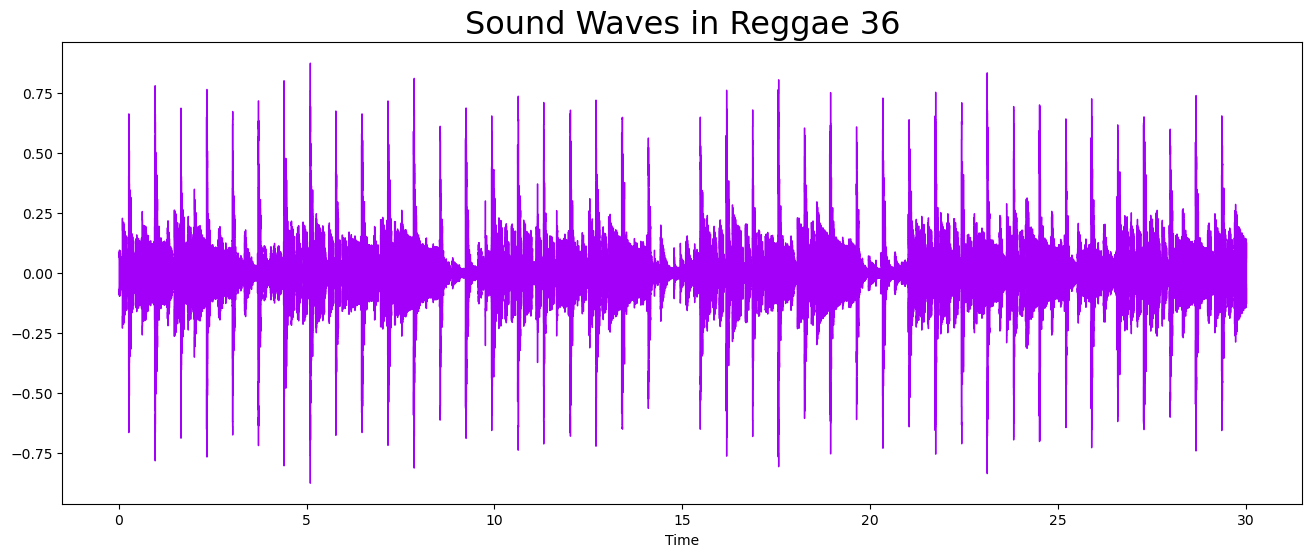

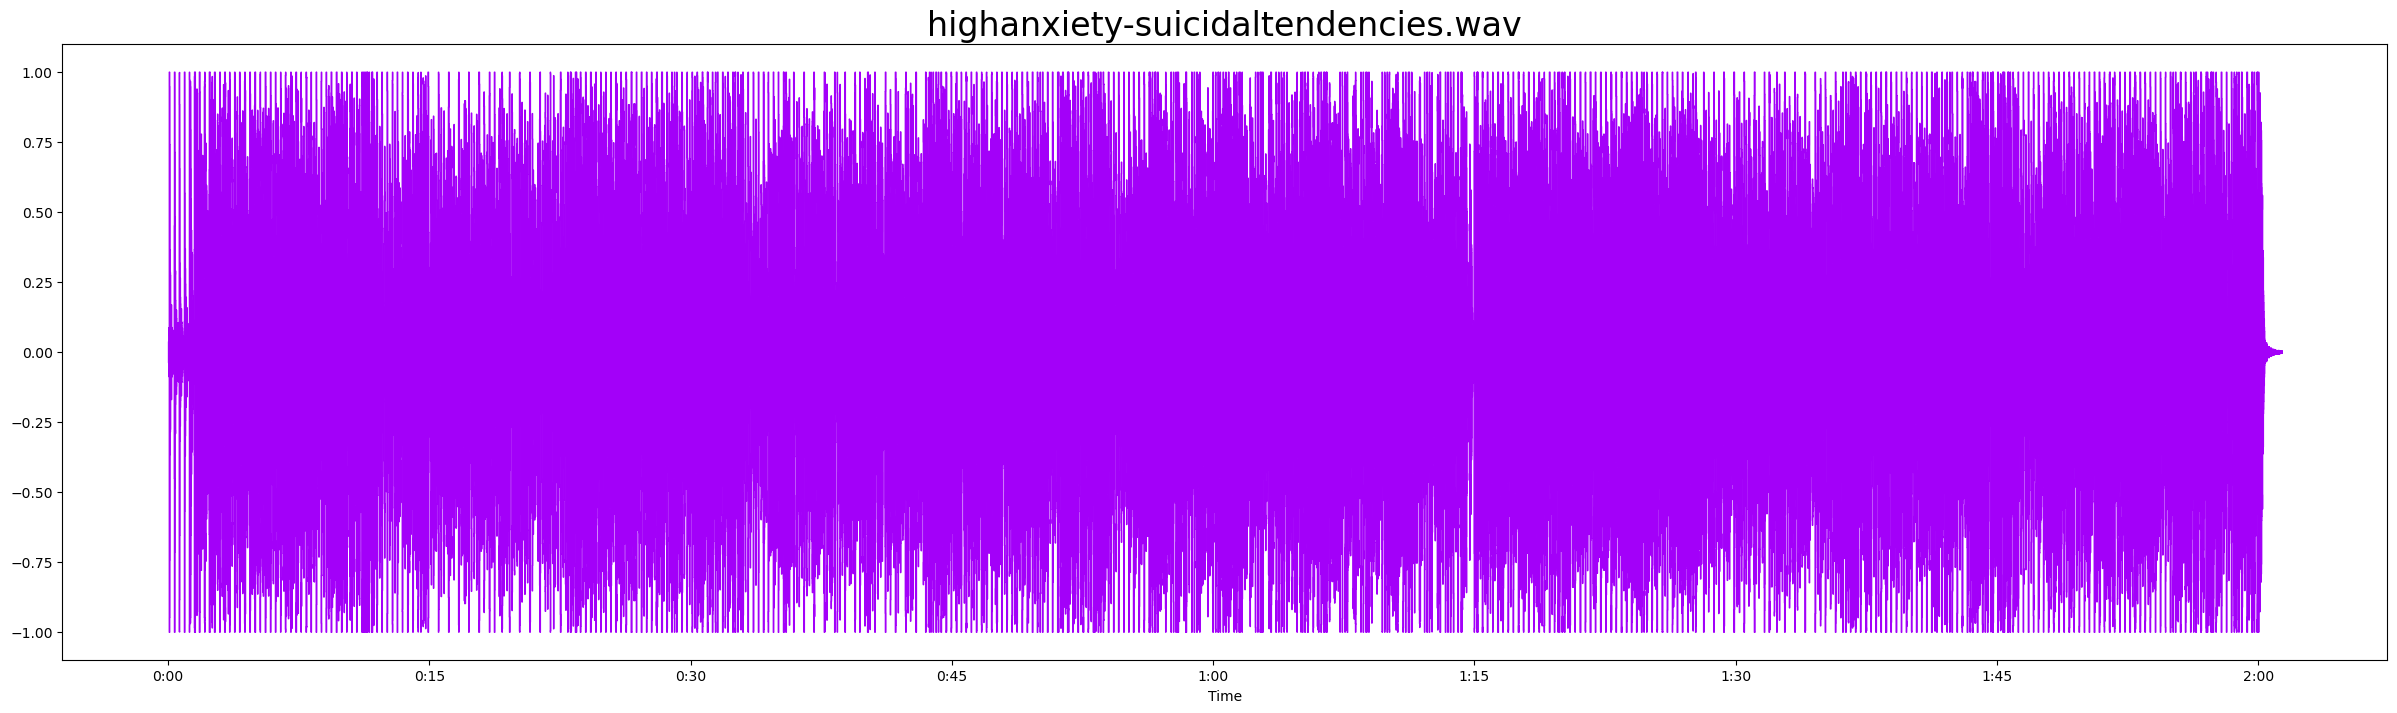

In [7]:
dur_s_4th_rounded = math.trunc(dur_s/4)

plt.figure(figsize = (dur_s_4th_rounded, 8))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title(song_1, fontsize = 24)

### Fourier Transform

* Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
* Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

```
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))
```

```
plt.figure(figsize = (16, 6))
plt.plot(D);
```
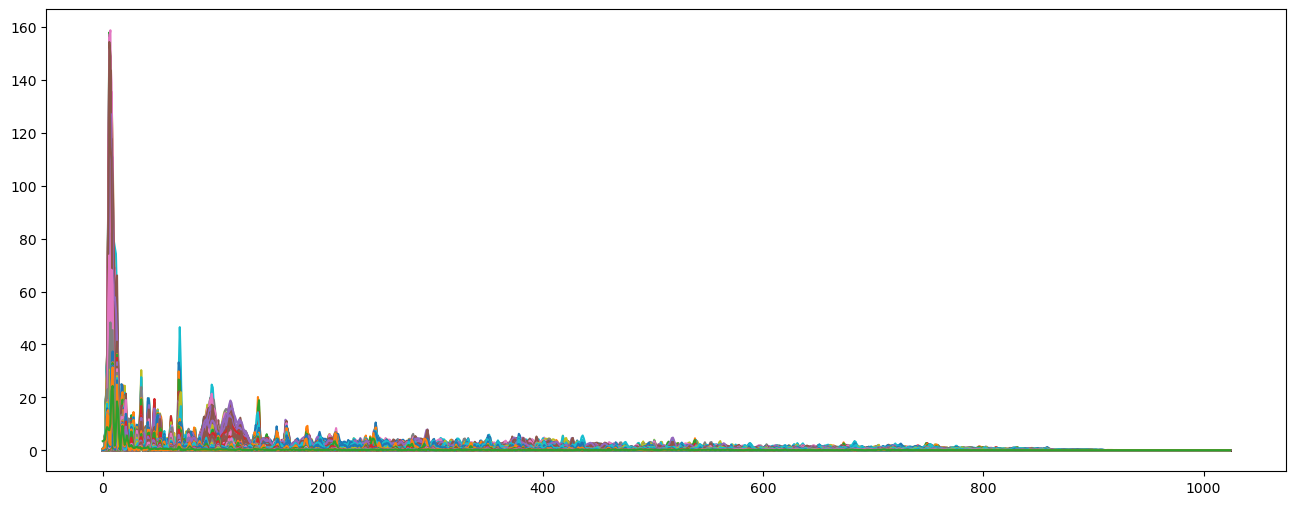

In [8]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 10453)


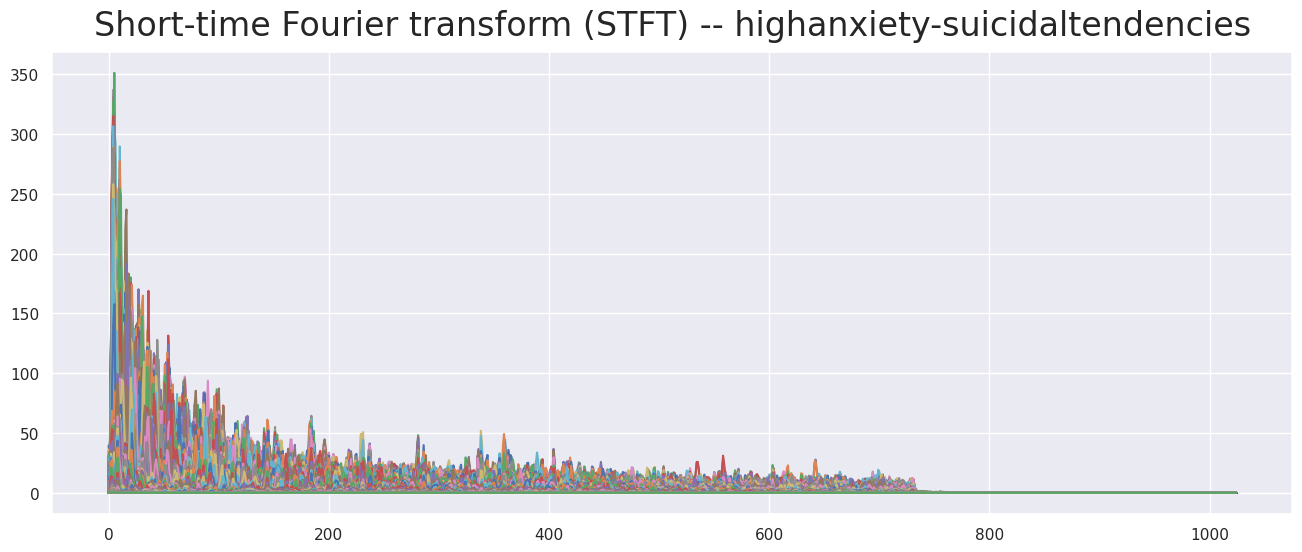

In [75]:
plt.figure(figsize = (16, 6))
# label = f'Short-time Fourier transform (STFT)--{song_1_name}'
label = chart_title_song_1('Short-time Fourier transform (STFT)')
plt.title(label=label, pad=CHART_TITLE_PAD,
          fontsize=CHART_TITLE_FONTSIZE)
plt.plot(D);
save_slom_1_chart(filename=label, plt=plt)

![Short-time Fourier transform (STFT) -- highanxiety-suicidaltendencies.png](<attachment:Short-time Fourier transform (STFT) -- highanxiety-suicidaltendencies.png>)

### The Spectrogram

* What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams ([wiki](https://en.wikipedia.org/wiki/Spectrogram)).
* Here we convert the frequency axis to a logarithmic one.

```
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();
```

![alt text](ex_outputs/spectrogram.png)

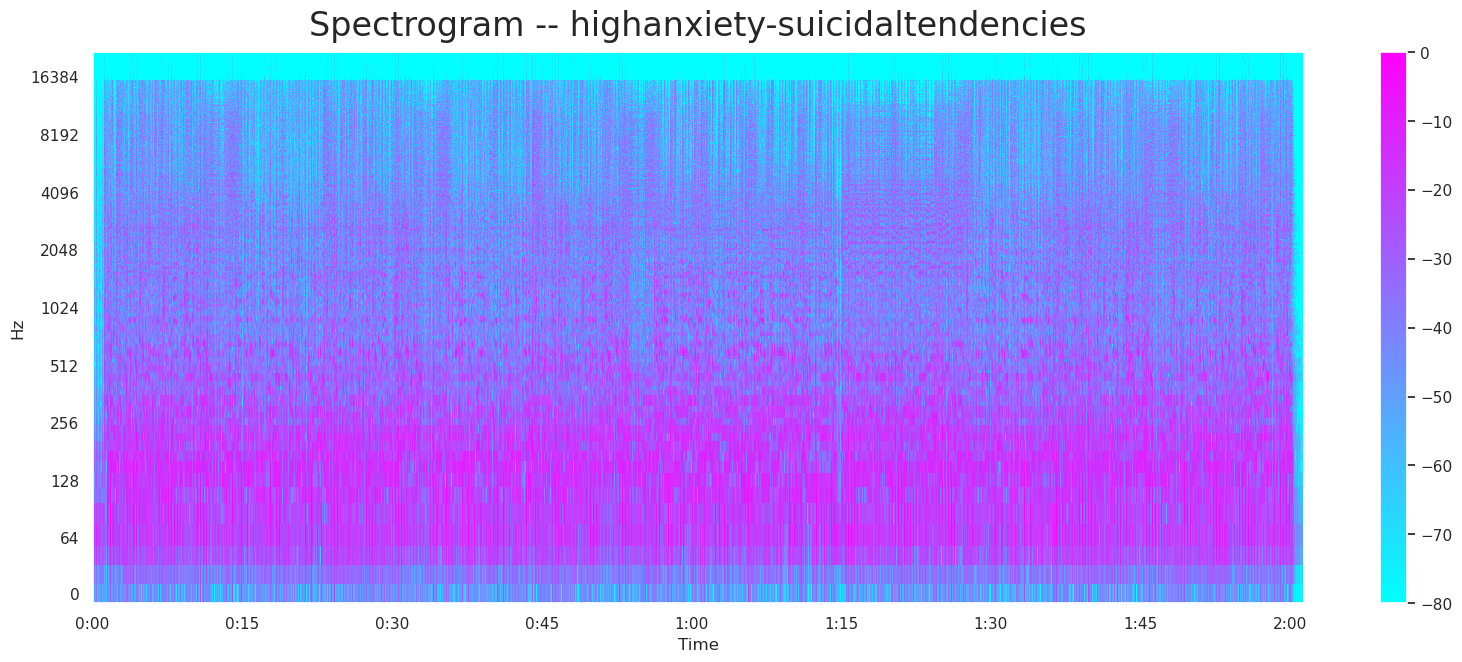

In [76]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
label=chart_title_song_1('Spectrogram')
plt.tight_layout(pad=0)
plt.title(label=label, pad=CHART_TITLE_PAD, fontsize=CHART_TITLE_FONTSIZE)
spectrogram = plt.colorbar();
save_slom_1_chart(label, plt)

### Mel Spectrogram

* The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

```python
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);
```

```python
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);
```

![Classical Mel Spectrogram -- classical36.png](<attachment:Classical Mel Spectrogram -- classical36.png>)
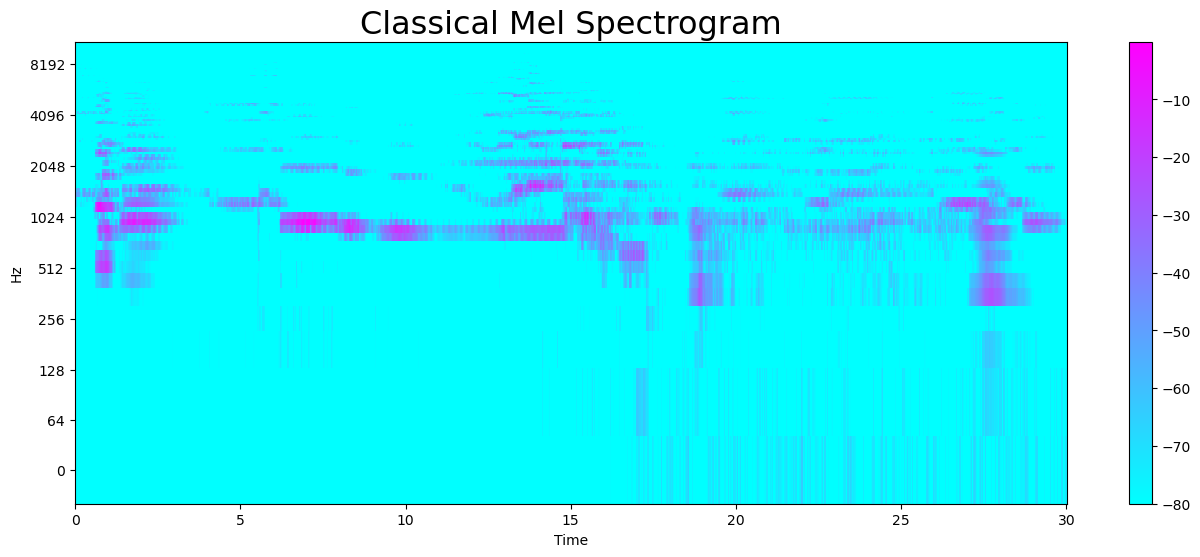

```python
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);
```

![Metal Mel Spectrogram -- metal36.png](<attachment:Metal Mel Spectrogram -- metal36.png>)
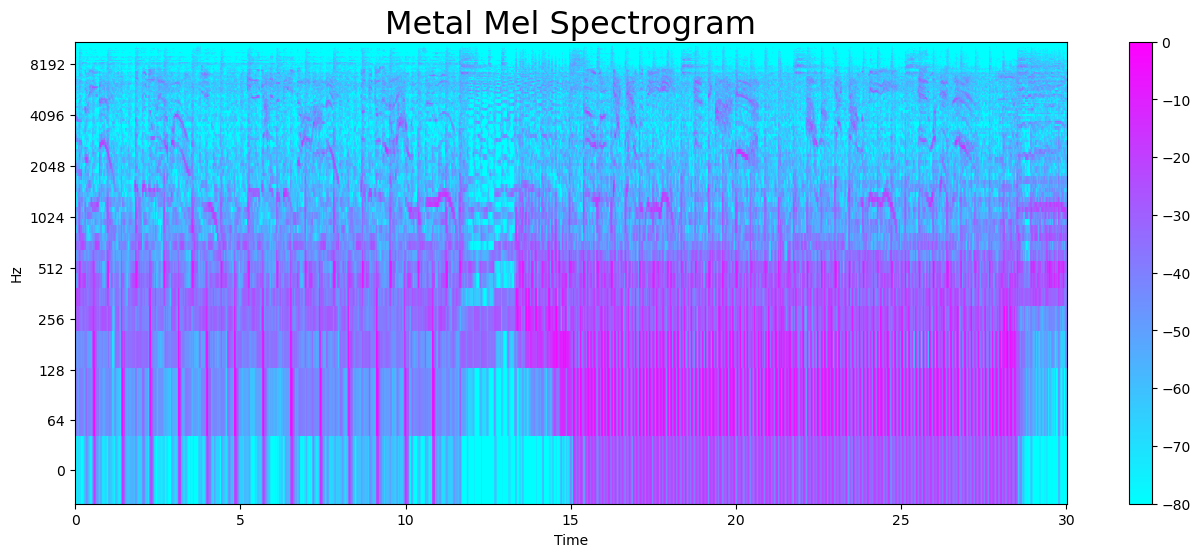

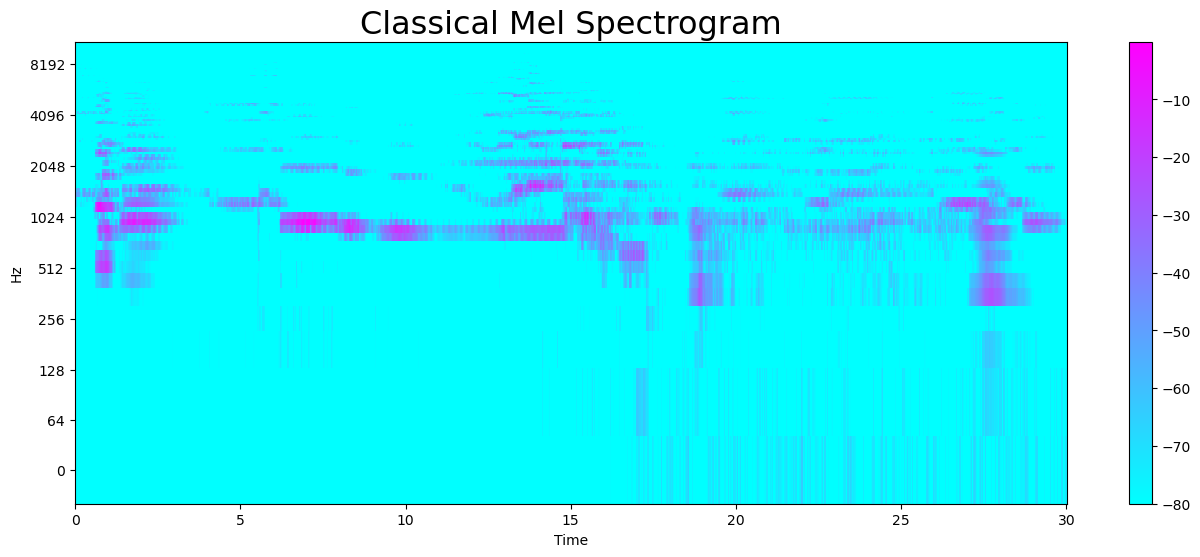

In [ ]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

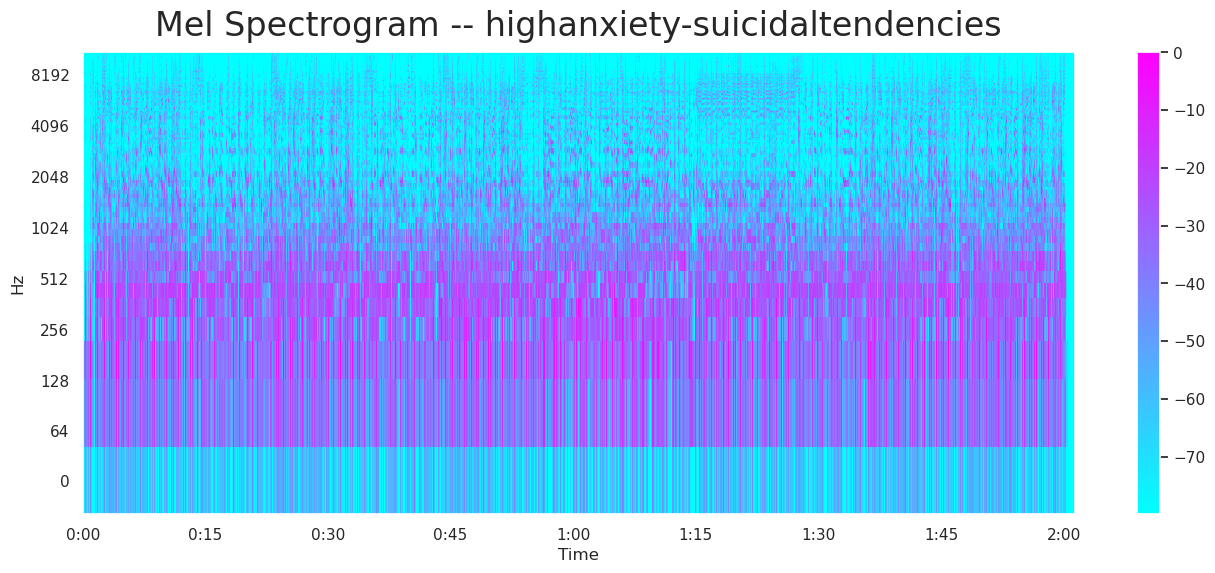

In [79]:
y, sr = librosa.load(song_1_path)
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))

librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool');

plt.colorbar();

title = chart_title_song_1('Mel Spectrogram')
plt.title(title, pad=CHART_TITLE_PAD, fontsize=CHART_TITLE_FONTSIZE)
save_slom_1_chart(title, plt)

## Audio Features

### Zero Crossing Rate

* the rate at which the signal changes from positive to negative or back.

In [11]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


### Harmonics and Perceptrual

* Harmonics are characteristichs that human years can't distinguish (represents the sound color)
* Perceptrual understanding shock wave represents the sound rhythm and emotion

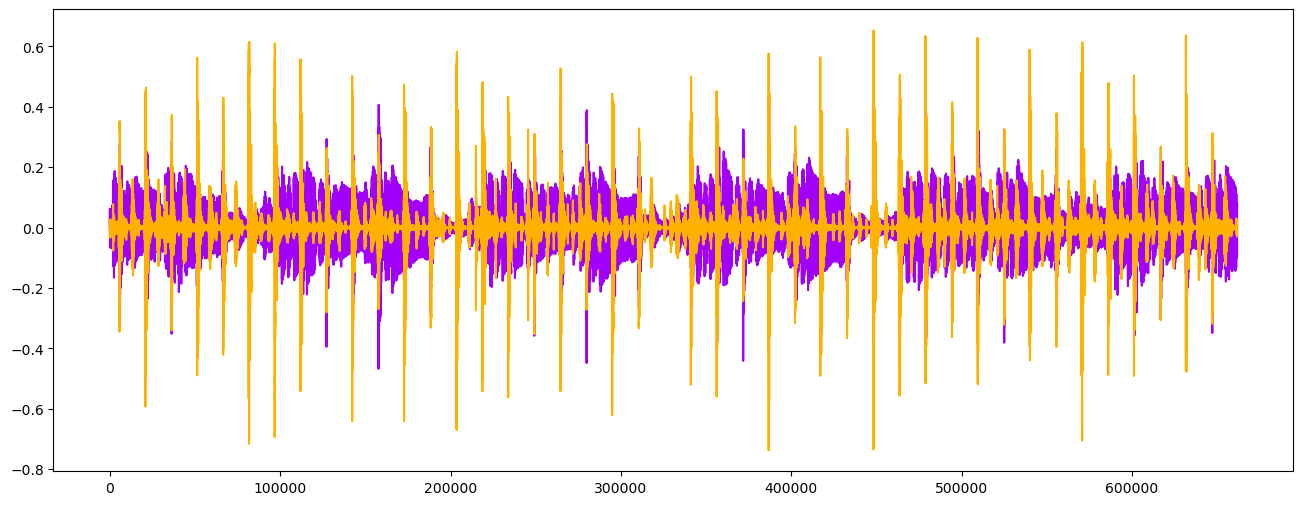

In [12]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

### Tempo BMP (beats per minute)

Dynamic programming beat tracker.

In [13]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

107.666015625

### Spectral Centroid

* indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [14]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1758.29476821 1946.74243805 2038.81133429 ...  766.50415702 1041.07728753
 1391.05146262] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


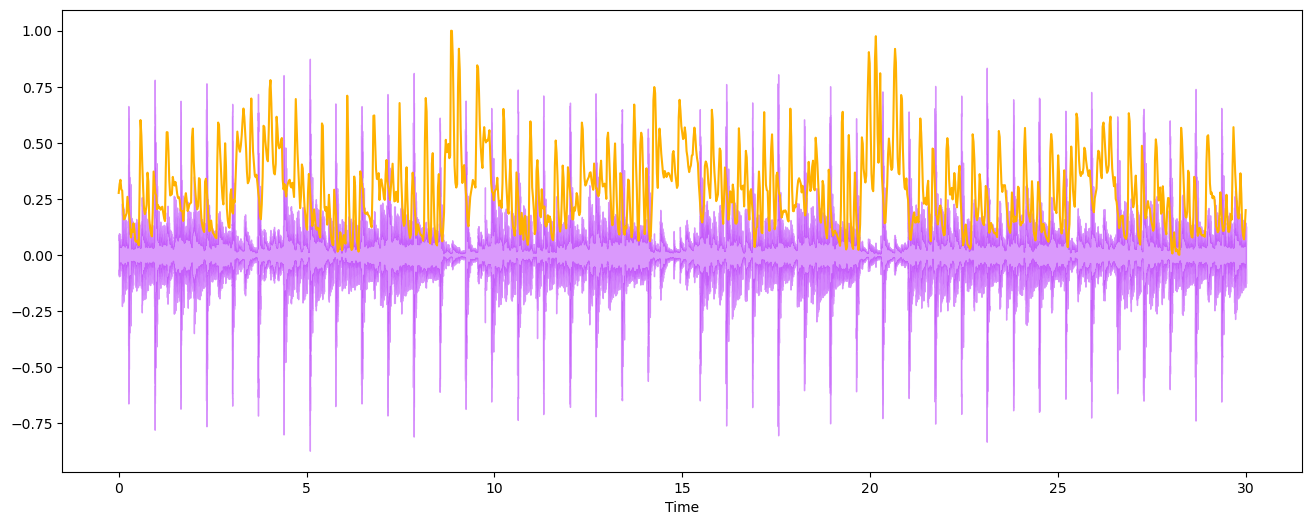

In [15]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

### Spectral Rolloff
* is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

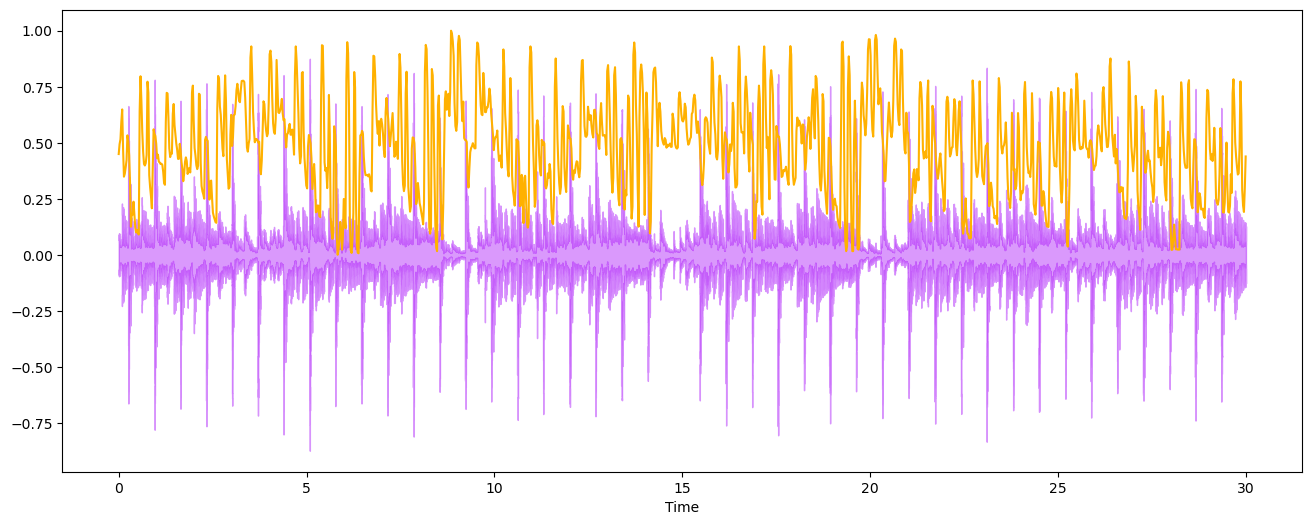

In [16]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

### Mel-Frequency Cepstral Coefficients:

* The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


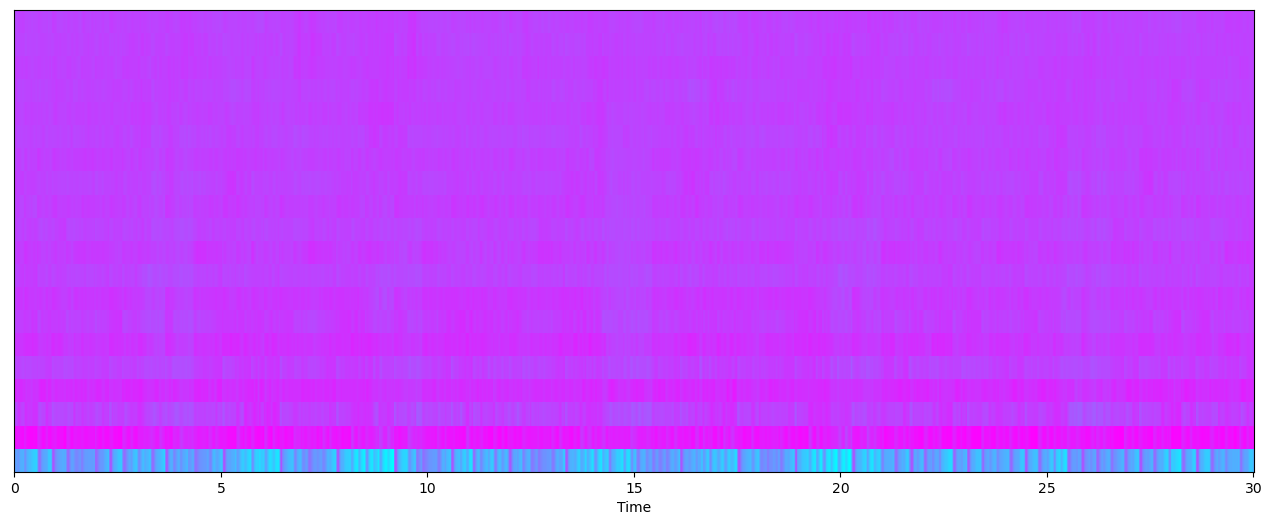

In [17]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data needs to be scaled:

Mean: -1.9176745e-09 

Var: 1.0000001


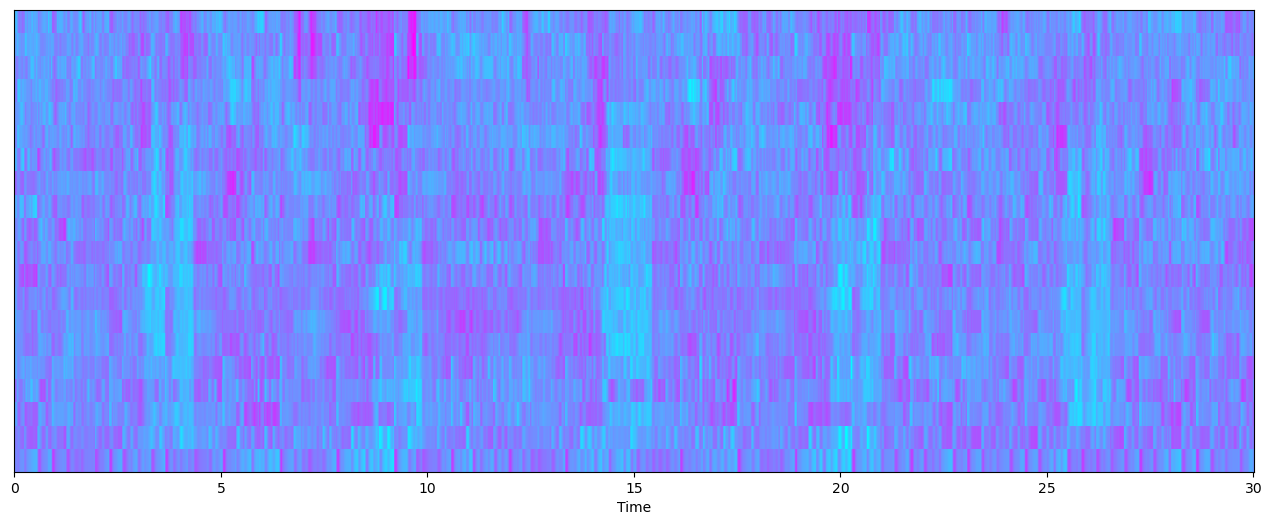

In [18]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

### Chroma Frequencies

* Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


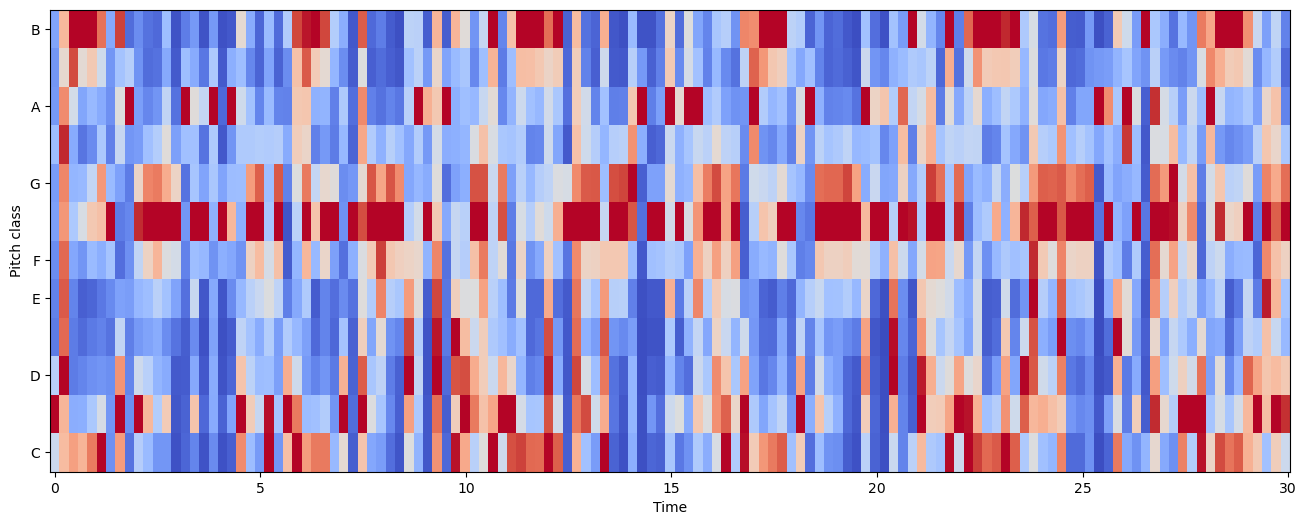

In [19]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromagram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromagram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## EDA

EDA is going to be performed on the `features_30_sec.csv`. This file contains the mean and variance for each audio file fo the features analysed above. 

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [20]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Correlation Heatmap for feature means

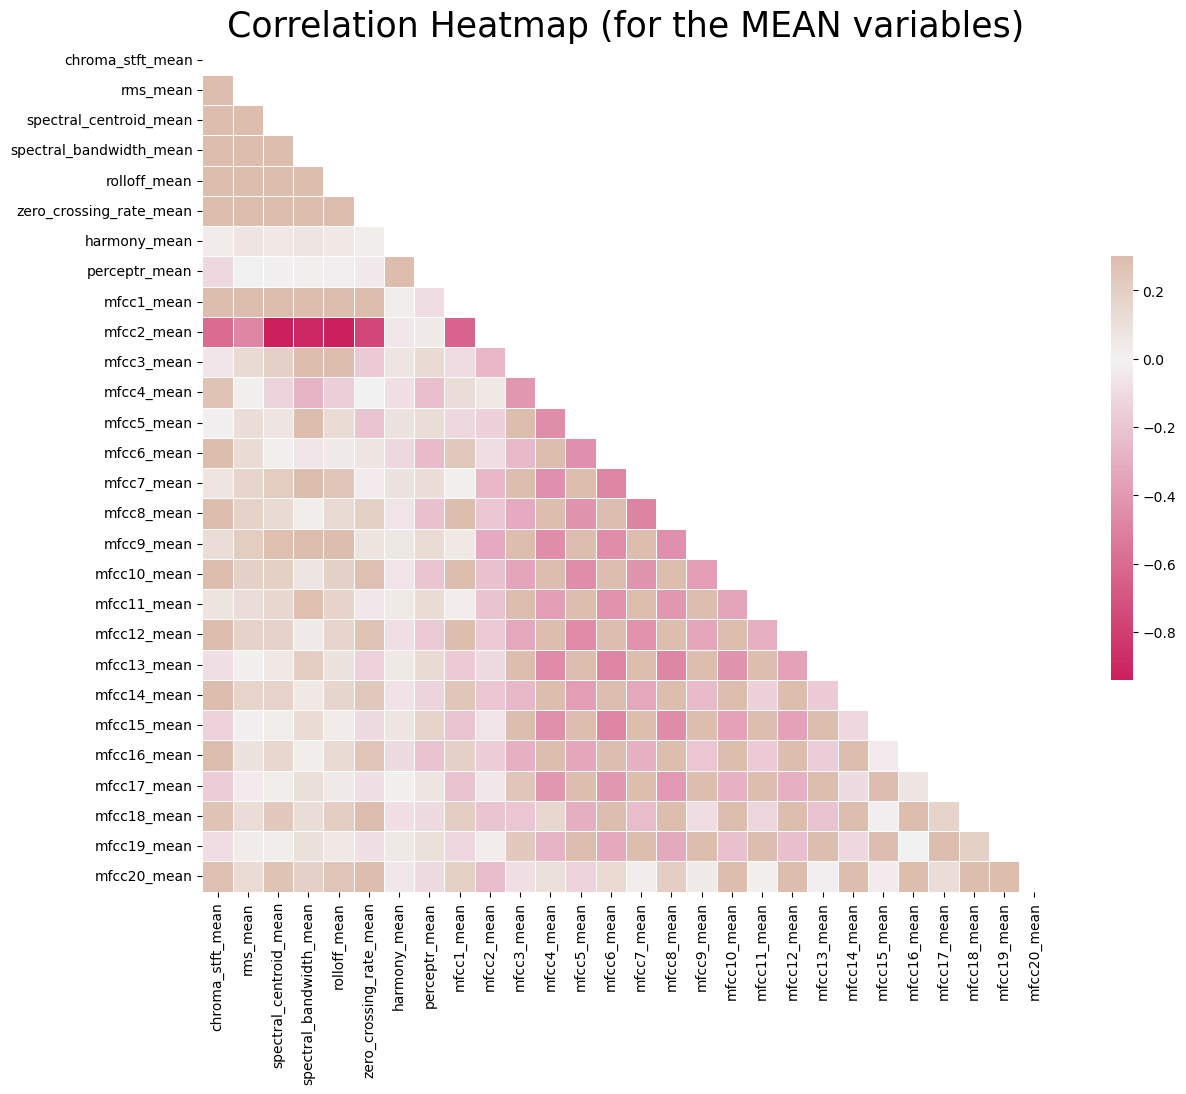

In [21]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

### Box Plot for Genres Distributions

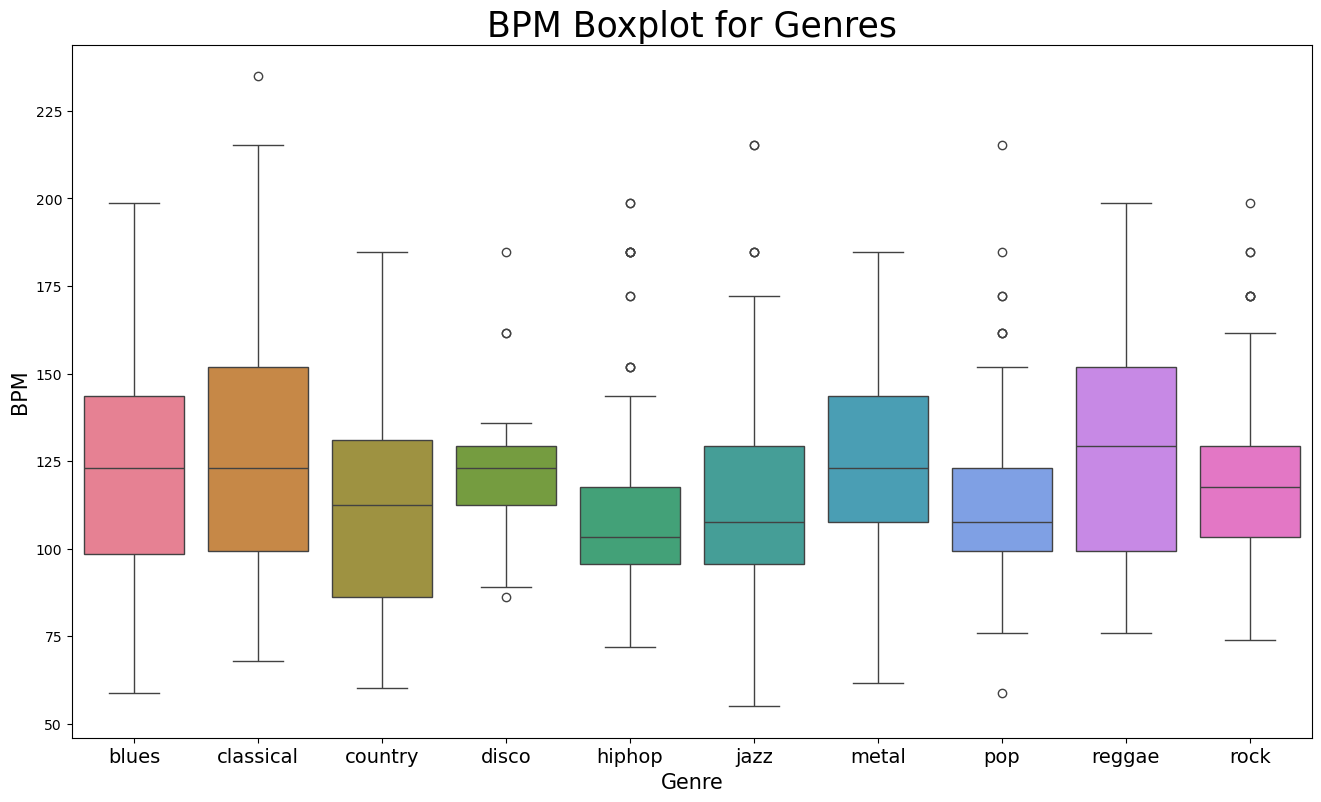

In [22]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

### Principal Component Analysis - to visualize possible groups of genres

1. Normalization
2. PCA
3. The Scatter Plot

In [23]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

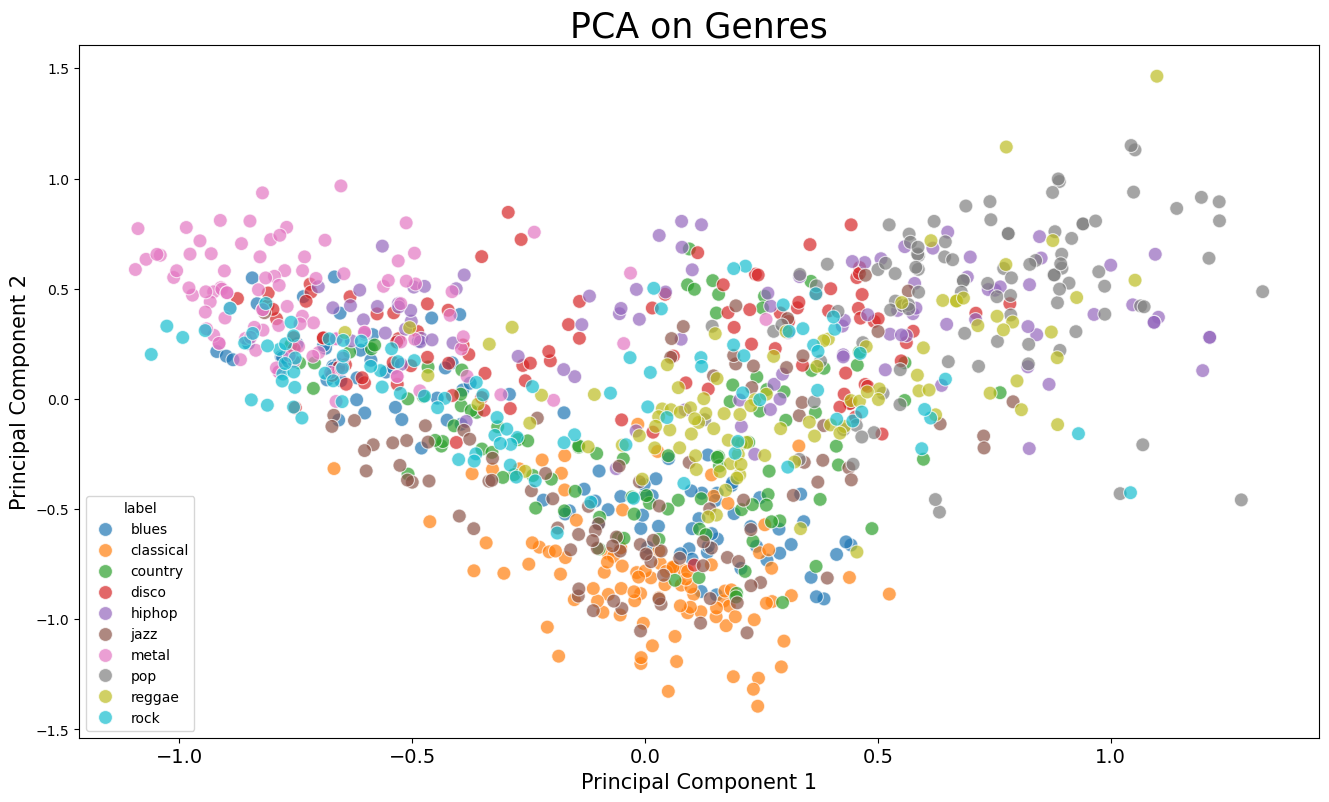

In [24]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Machine Learning Classification

Using the `features_3_sec.csv` file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

### Libraries

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

### Reading in the Data

Now let's try to predict the Genre of the audio using Machine Learning techniques.

In [26]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Features and Target variable

* creates the target and feature variables
* normalizes the data

In [27]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

le = LabelEncoder()

### Splitting the data into training and testing

* 70% - 30% split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
le_y_train = le.fit_transform(y_train)
le_y_test = le.fit_transform(y_test)

### Creating a Predefined function to assess the accuracy of a model

* input is the model
* fits the model on the training dataset
* predicts on the testing features
* compares the predictions with the actuals

In [29]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print(f'{title}:', round(accuracy_score(y_test, preds), 5))
    print()

In [30]:
def le_model_assess(model, title = "Default"):
    model.fit(X_train, le_y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print(f'{title}:', round(accuracy_score(le_y_test, preds), 5))
    print()

<hr />
<hr />

# Classifier Model Training And Accuracy Tests

### Trying 10 different models to assess their performance

We tried 10 classification models, the best performing model was XGBooster.

#### Accuracy

In [31]:
%%time
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

Naive Bayes: 0.51952

CPU times: user 13.5 ms, sys: 3.13 ms, total: 16.7 ms
Wall time: 15.8 ms


In [32]:
%%time
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

Stochastic Gradient Descent: 0.65532

CPU times: user 209 ms, sys: 140 ms, total: 349 ms
Wall time: 188 ms


In [33]:
%%time
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

KNN: 0.80581

CPU times: user 1.21 s, sys: 904 ms, total: 2.11 s
Wall time: 208 ms


In [34]:
%%time
# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

Decission trees: 0.64231

CPU times: user 556 ms, sys: 385 µs, total: 556 ms
Wall time: 556 ms


In [35]:
%%time
# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

Random Forest: 0.81415

CPU times: user 28.5 s, sys: 61.9 ms, total: 28.6 s
Wall time: 28.6 s


In [36]:
%%time
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

Support Vector Machine: 0.75409

CPU times: user 1.49 s, sys: 133 µs, total: 1.49 s
Wall time: 1.49 s


In [37]:
%%time
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

Logistic Regression: 0.6977

CPU times: user 2.96 s, sys: 7.25 s, total: 10.2 s
Wall time: 524 ms


In [38]:
%%time
# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Neural Nets: 0.67467

CPU times: user 10min 29s, sys: 20min 59s, total: 31min 29s
Wall time: 1min 56s


In [39]:
%%time
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, enable_categorical=True)
le_model_assess(xgb, "Cross Gradient Booster")

Cross Gradient Booster: 0.9009

CPU times: user 11min 52s, sys: 1.29 s, total: 11min 54s
Wall time: 36.2 s


In [43]:
%%time
# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax', enable_categorical=True)
le_model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Cross Gradient Booster (Random Forest): 0.74408

CPU times: user 2min 20s, sys: 49 ms, total: 2min 20s
Wall time: 7.13 s


### XGBoost is the winner - 90% accuracy

* create the final model
* compute confusion matrix
* Compute Feature Importance

In [ ]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

<hr />

## Pytorch

In [47]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchaudio
from torchaudio import datasets

##### *Warning this tries to make a directory on the fs (may break if running in the cloud)

In [88]:
MUSIC = "music"
DOWNLOAD = "download"
GTZAN = "gtzan"

cwd = Path.cwd()
DOWNLOAD_DIR = Path.joinpath(cwd, MUSIC, DOWNLOAD)
GTZAN_DOWNLOAD_DIR = Path.joinpath(cwd, MUSIC, DOWNLOAD, GTZAN)

GTZAN_DOWNLOAD_DIR.mkdir(exist_ok=True)

print(f'\'{Path.absolute(GTZAN_DOWNLOAD_DIR)}\'')
print('dir exists:', Path.exists(GTZAN_DOWNLOAD_DIR),
      '\t', 'is_dir:', Path.is_dir(GTZAN_DOWNLOAD_DIR))

'/home/adombrowski/workspace/music-discovery-recommender/music/download/gtzan'
dir exists: True 	 is_dir: True


*pytorch dataset download is broken

In [2]:
from huggingface_hub import hf_hub_download

/home/adombrowski/anaconda3/envs/music-reco/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### *requires remote code execution from huggingface marsyas/gtzan

In [7]:
import huggingface_hub
from datasets import load_dataset_builder, load_dataset
from datasets import get_dataset_split_names, get_dataset_config_names

_URL = "http://opihi.cs.uvic.ca/sound/genres.tar.gz"

ds_builder = load_dataset_builder("marsyas/gtzan", trust_remote_code=True)

In [8]:
# Inspect dataset description
print(ds_builder.info.description)

GTZAN is a dataset for musical genre classification of audio signals. The dataset consists of 1,000 audio tracks, each of 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22,050Hz Mono 16-bit audio files in WAV format. The genres are: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock.



In [9]:
# Inspect dataset features
ds_builder.info.features

{'file': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=22050, mono=True, decode=True, id=None),
 'genre': ClassLabel(names=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], id=None)}

In [ ]:

gtzan = load_dataset("gtzan", trust_remote_code=True)
get_dataset_config_names("gtzan", trust_remote_code=True)
# get_dataset_split_names("gtzan", "en", trust_remote_code=True)

# ds_builder = load_dataset_builder("gtzan", download_mode=)

In [ ]:
train_data = datasets.GTZAN(root=GTZAN_DOWNLOAD_DIR,
                            download=False, subset="training")

In [ ]:
test_data = datasets.GTZAN(root=GTZAN_DOWNLOAD_DIR,
                           download=False, subset="testing")

In [60]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    figure, ax = plt.subplots()
    ax.specgram(waveform[0], Fs=sample_rate)
    figure.suptitle(title)
    figure.tight_layout()

<hr />
<hr />

### Feature Importance

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

# Recommender Systems

"Recomender" Systems enable us for any given vector to find the best similarity, ranked in descending order, from the bast match to the least best match. 

For Audio files, this will be done through `cosine_similarity` library.

In [ ]:
# Libraries
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv(f'{general_path}/features_30_sec.csv', index_col='filename')

# Extract labels
labels = data[['label']]

# Drop labels from original dataframe
data = data.drop(columns=['length','label'])
data.head()

# Scale the data
data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

### Cosine similarity

Calculates the *pairwise cosine similarity* for each combination of songs in the data. This results in a 1000 x 1000 matrix (with redundancy in the information as item A similarity to item B == item B similarity to item A).

In [ ]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

### Song similarity scoring

`find_similar_songs()` - is a predefined function that takes the name of the song and returns top 5 best matches for that song.

In [ ]:
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)
    
    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)
    
    # Display the 5 top matches 
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

### Putting the Similarity Function into Action:

### POP Example

In [ ]:
# pop.00019 - Britney Spears "Hit me baby one more time"
find_similar_songs('pop.00019.wav') 

ipd.Audio(f'{general_path}/genres_original/pop/pop.00019.wav')

### Similar song match no.1 
*Britney Spears* - **I'm so curious (2009 remaster)**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00023.wav')

### Similar song match no.2
*Britney Spears* - **Sometimes**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00034.wav')

### Similar song match no.3
*Jennifer Lopez* - **Play**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00078.wav')

### Similar song match no.4
*Mandy Moore* - **Candy**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00088.wav')

### Similar song match no.5
*Mandy Moore* - **Everything my heart desires**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00091.wav')

### METAL Example

In [ ]:
# metal.00002 - Iron Maiden "Flight of Icarus"
find_similar_songs('metal.00002.wav') 

ipd.Audio(f'{general_path}/genres_original/metal/metal.00002.wav')

### Similar song match no.1 
*Motorhead* - **Ace of Spades**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/metal/metal.00028.wav')

### Similar song match no.2
*Queen* - **Tear it Up**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/metal/metal.00059.wav')

### Similar song match no.3
*Queen* - **Another One Bites The Dust**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/rock/rock.00018.wav')

### Similar song match no.4
*Queen* - **Under Pressure**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/rock/rock.00017.wav')

### Similar song match no.5
*Queen* - **Tie Your Mother Down**

In [ ]:
ipd.Audio(f'{general_path}/genres_original/rock/rock.00016.wav')

<div class="alert alert-block alert-info">
<p>If you liked this, don't be shy, upvote! 😁<p>

<b>Toodles!<b>
</div>